In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [60]:
#Load dataset
df = sns.load_dataset('diamonds')

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Column x, y and z are the length, width and depth of the diamond. 

In [62]:
# Creating a single column of x, y and z named called volume of diamonds 
df['volume'] = df['x'] * df['y'] * df['z']

In [63]:
df.drop(columns=['x', 'y', 'z'], inplace=True)

In [64]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,volume
30877,0.33,Premium,E,SI1,61.1,58.0,743,53.861712
23918,1.54,Premium,G,SI1,61.0,59.0,12044,247.846968
19453,1.21,Good,G,VS2,63.8,56.0,8099,192.410824
3686,0.90,Very Good,I,VS1,62.6,58.0,3447,145.852630
7313,1.00,Very Good,G,SI2,62.8,57.0,4207,159.974906


In [65]:
# Move 'volume' to the front
cols = ['volume'] + [col for col in df.columns if col != 'volume']
df = df[cols]

df.head()

,volume,carat,cut,color,clarity,depth,table,price
0,38.202030,0.23,Ideal,E,SI2,61.5,55.0,326
1,34.505856,0.21,Premium,E,SI1,59.8,61.0,326
2,38.076885,0.23,Good,E,VS1,56.9,65.0,327
3,46.724580,0.29,Premium,I,VS2,62.4,58.0,334
4,51.917250,0.31,Good,J,SI2,63.3,58.0,335


In [66]:
df.shape

(53940, 8)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   volume   53940 non-null  float64 
 1   carat    53940 non-null  float64 
 2   cut      53940 non-null  category
 3   color    53940 non-null  category
 4   clarity  53940 non-null  category
 5   depth    53940 non-null  float64 
 6   table    53940 non-null  float64 
 7   price    53940 non-null  int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 2.2 MB


In [68]:
df.isnull().sum()

volume     0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,53940.0,129.849403,78.245262,0.0,65.13683,114.808572,170.842451,3840.59806
carat,53940.0,0.797940,0.474011,0.2,0.40000,0.700000,1.040000,5.01000
depth,53940.0,61.749405,1.432621,43.0,61.00000,61.800000,62.500000,79.00000
table,53940.0,57.457184,2.234491,43.0,56.00000,57.000000,59.000000,95.00000
price,53940.0,3932.799722,3989.439738,326.0,950.00000,2401.000000,5324.250000,18823.00000


In [70]:
df.corr(numeric_only=True)['price']

volume    0.902385
carat     0.921591
depth    -0.010647
table     0.127134
price     1.000000
Name: price, dtype: float64

In [71]:
df.duplicated().sum()

np.int64(146)

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
X = df.iloc[:, :7]
y = df.iloc[:, -1]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
df['volume'] = df['volume'].replace(0.0, 0.01)

### Visualization of before transformation 

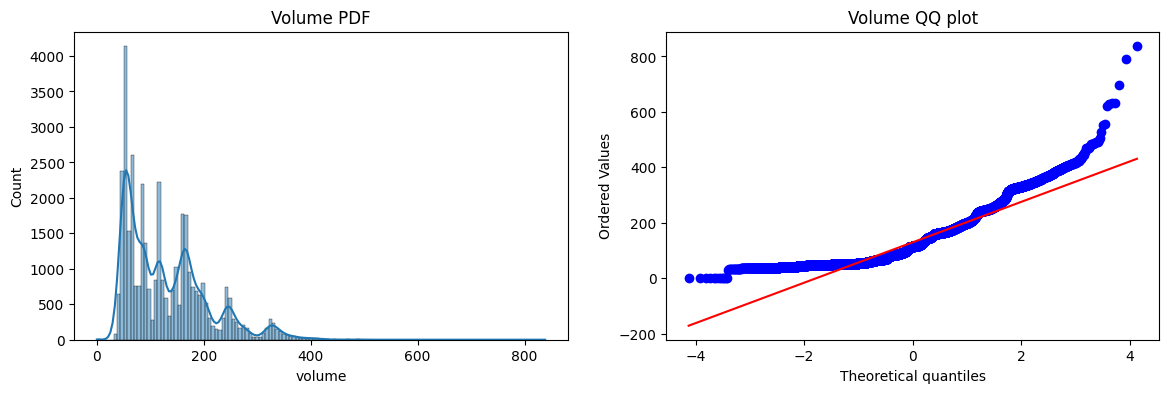

In [86]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['volume'], kde=True)
plt.title('Volume PDF')

plt.subplot(122)
stats.probplot(X_train['volume'], dist='norm', plot=plt)
plt.title('Volume QQ plot')
plt.show()

### Visualization of After transformation

In [95]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [97]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [98]:
cut_categories = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'] 

In [100]:
preprocessor = ColumnTransformer([
    ('ordinal_encoding', OrdinalEncoder(categories=[cut_categories]), ['cut'])
], remainder='passthrough')

In [101]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoding',
                                 OrdinalEncoder(categories=[['Ideal', 'Premium',
                                                             'Good',
                                                             'Very Good',
                                                             'Fair']]),
                                 ['cut'])])

In [102]:
df

,volume,carat,cut,color,clarity,depth,table,price
0,38.202030,0.23,Ideal,E,SI2,61.5,55.0,326
1,34.505856,0.21,Premium,E,SI1,59.8,61.0,326
2,38.076885,0.23,Good,E,VS1,56.9,65.0,327
3,46.724580,0.29,Premium,I,VS2,62.4,58.0,334
4,51.917250,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...,...
53935,115.920000,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,118.110175,0.72,Good,D,SI1,63.1,55.0,2757
53937,114.449728,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,140.766120,0.86,Premium,H,SI2,61.0,58.0,2757
